# House Price Prediction

## Baseline Method and Score

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
# read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# get other train info
num_train = train.shape[0]
id_train = train['Id']
y_train = train['SalePrice']
x_train = train.drop(['Id','SalePrice'], axis=1)
print('x_train shape:', x_train.shape)

# get other test info
num_test = test.shape[0]
id_test = test['Id']
x_test = test.drop(['Id'], axis=1)
print('x_test shape:', x_test.shape)

# combine train and test data
comb = pd.concat([x_train, x_test], ignore_index=True)
print('combined shape:', comb.shape)

x_train shape: (1460, 79)
x_test shape: (1459, 79)
combined shape: (2919, 79)


Number of features with NA: 34


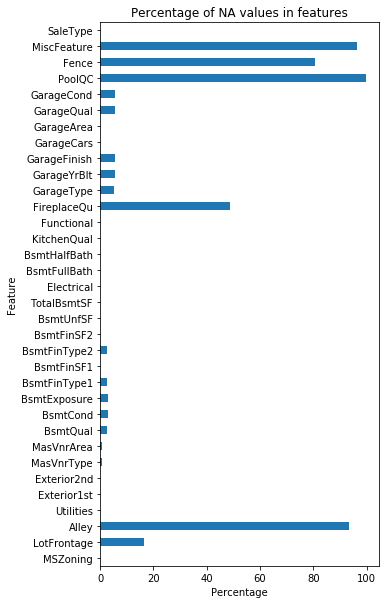

Inital NA count:
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [3]:
# count NAs for each feature
na_count = comb.isnull().sum()
na_count = na_count[na_count!=0]
print('Number of features with NA:', na_count.shape[0])

# plot percentage of NA values
na_pct = na_count.div(2919).multiply(100)
na_pct.plot.barh(figsize=(5,10))
plt.title('Percentage of NA values in features')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.show()
print('Inital NA count:')
print(na_count)

In [4]:
# dropping columns with NA
comb_wona = comb.dropna(axis=1)
print('Number of remaining features:', comb_wona.shape[1])
print(comb_wona.columns)

Number of remaining features: 45
Index([u'MSSubClass', u'LotArea', u'Street', u'LotShape', u'LandContour',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'ExterQual', u'ExterCond', u'Foundation', u'Heating',
       u'HeatingQC', u'CentralAir', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'PavedDrive',
       u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch',
       u'ScreenPorch', u'PoolArea', u'MiscVal', u'MoSold', u'YrSold',
       u'SaleCondition'],
      dtype='object')


In [5]:
# convert to one-hot encoding
comb_oh = pd.get_dummies(comb_wona)
print('Shape after one hot encoding:', comb_oh.shape)

Shape after one hot encoding: (2919, 149)


In [6]:
# extract train and test data from combined
x_train = comb_oh[:num_train]
x_test = comb_oh[num_train:]

In [7]:
# root mean squared log error
def rmsle(pred, gtruth):
    mse = mean_squared_error(np.log1p(gtruth), np.log1p(pred))
    return np.sqrt(mse)

def kfold_cv(x, y, regr, k=5):
    kf = KFold(k)
    x = x.as_matrix()
    y = y.as_matrix()
    error = 0
    for train_idx, test_idx in kf.split(x, y):
        regr.fit(x[train_idx,:], y[train_idx])
        pred = regr.predict(x[test_idx,:])
        error += rmsle(pred, y[test_idx]) / float(k)
    return error

In [8]:
# # use linear regression
# regr = LinearRegression()
# error = kfold_cv(x_train, y_train, regr, k=3)
# print(error)
# === NOTE ===
# Raises an error: input for log function too large

In [9]:
# use linear regression with 2-norm regularization
regr = Ridge()
error = kfold_cv(x_train, y_train, regr)
print(error)

0.175941520473
